In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

p = sns.color_palette
np.random.seed(0)

# Generating a dataset

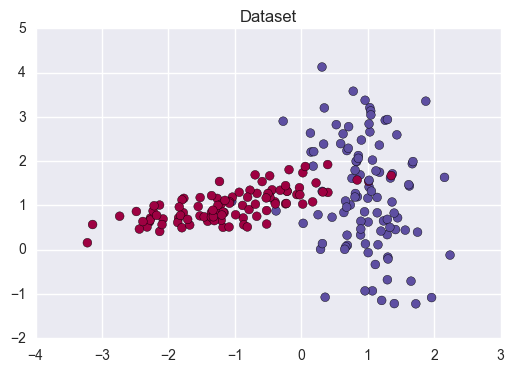

In [20]:
# Generate a dataset and plot it
X, Y = sklearn.datasets.make_classification(random_state=0, n_samples = 200, n_features = 2, n_redundant=0, n_informative=2, n_classes=2, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.title('Dataset')
plt.show()

# CART(GINI)

基尼指数表示不确定性（基尼不纯度）（越小越好）

$$Gini(p)=\sum_{k=1}^Kp_k(1-p_k)=1-\sum_{k=1}^Kp_k^2$$

$$Gini(D)=1-\sum_{k=1}^K\left(\frac{|C_k|}{|D|}\right)^2$$

$$Gini(D,A)=\frac{|D_1|}{|D|}Gini(D_1)+ \frac{|D_2|}{|D|}Gini(D_2)$$

CART是二叉树（统计学习方法）

In [21]:
clf=tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

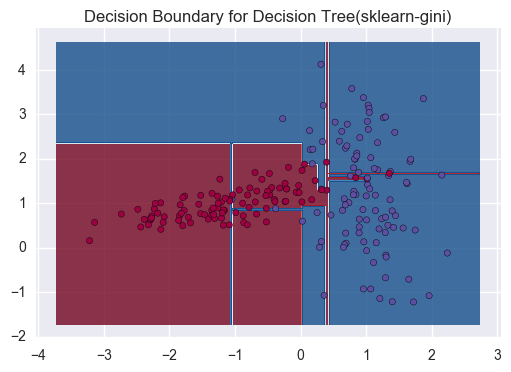

In [22]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Decision Tree(sklearn-gini)")
plt.show()

### 如图，sklearn中的决策树最大深度，比特征数多得多（和《统计学习方法》上的不一样。。。）。看了sklearn的相关代码，max_depth如果不指定，那就会一直迭代直到所有叶子节点label一样或者叶子节点包含样本数小于min_samples_split，min_samples_split (default=2)

### 连续值的处理：二分法（C4.5）,连续属性离散化，属性值排序后遍历找到最好的划分点

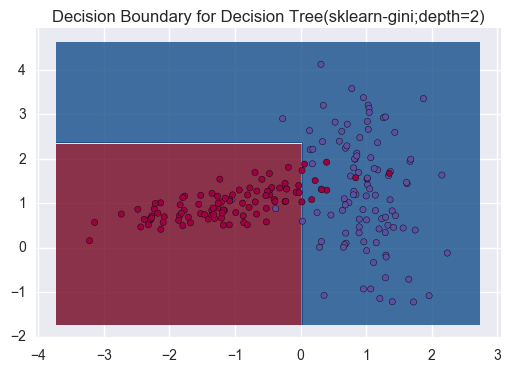

In [71]:
clf=tree.DecisionTreeClassifier(criterion='gini', max_depth=2)
clf.fit(X, Y)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Decision Tree(sklearn-gini;depth=2)")
plt.show()

先实现上图那种简单的吧。。

In [121]:
def calcGINI(label):
    num = len(label)
    labelCounts = {}
    for i in label:
        if i not in labelCounts:
            labelCounts[i] = 0
        labelCounts[i] += 1
    Gini = 1.0
    for i in labelCounts:
        prob = labelCounts[i] / num  # python3 default float
        Gini -= prob * prob
    return Gini

### 第一次划分

In [125]:
split_node_A0 = 0
min_entropy = 10000
for i in X[:,0]:
    index = X[:,0] <= i
    temp_entropy = sum(index)/len(X) * calcGINI(Y[index]) + sum(~index)/len(X) * calcGINI(Y[~index])
    if temp_entropy <= min_entropy:
        min_entropy = temp_entropy
        split_node_A0 = i
print("min_GINI:", min_entropy)    
print("split_node_A0:", split_node_A0)      

min_GINI: 0.111462164607
split_node_A0: 0.0227189186045


与后面的划分结果一样，原谅我，不做了、、、

# ID3(information gain)

信息熵表示随机变量的不确定性

$$H(X)=-\sum_{i=1}^np_ilogp_i$$

$$H(Y|X)=\sum_{i=1}^np_iH(Y|X=x_i)$$

信息增益:不确定性的减小程度（越大越好）

$$g(D,A)=H(D)-H(D|A)$$

In [25]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

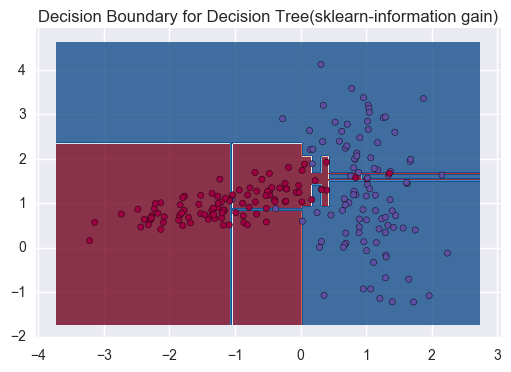

In [26]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Decision Tree(sklearn-information gain)")
plt.show()

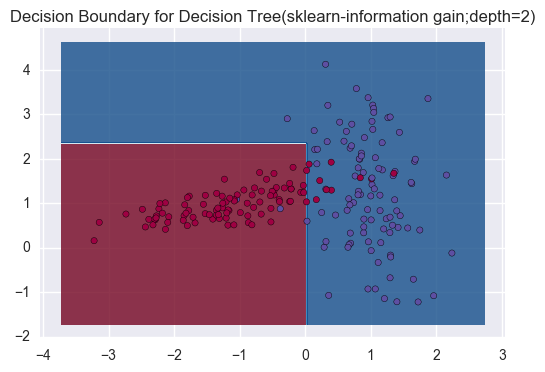

In [47]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, Y)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Decision Tree(sklearn-information gain;depth=2)")
plt.show()

In [17]:
def calcEntropy(label):
    num = len(label)
    labelCounts = {}
    for i in label:
        if i not in labelCounts:
            labelCounts[i] = 0
        labelCounts[i] += 1
    Entropy = 0.0
    for i in labelCounts:
        prob = labelCounts[i] / num  # python3 default float
        Entropy -= prob * math.log(prob, 2)
    return Entropy

### 第一次划分

In [30]:
calcEntropy(Y)

0.9999278640456615

$$H(D)=0.9999$$

In [45]:
split_node_A0 = 0
min_entropy = 10000
for i in X[:,0]:
    index = X[:,0] <= i
    temp_entropy = sum(index)/len(X) * calcEntropy(Y[index]) + sum(~index)/len(X) * calcEntropy(Y[~index])
    if temp_entropy <= min_entropy:
        min_entropy = temp_entropy
        split_node_A0 = i
print("min_entropy:", min_entropy)    
print("split_node_A0:", split_node_A0)      

min_entropy: 0.318430905349
split_node_A0: 0.0227189186045


$$g(D,A_0)=H(D)-H(D|A_0)=0.9999-0.3184=0.6815$$

In [46]:
split_node_A1 = 0
min_entropy = 10000
for i in X[:,1]:
    index = X[:,1] <= i
    temp_entropy = sum(index)/len(X) * calcEntropy(Y[index]) + sum(~index)/len(X) * calcEntropy(Y[~index])
    if temp_entropy <= min_entropy:
        min_entropy = temp_entropy
        split_node_A1 = i
print("min_entropy:", min_entropy)    
print("split_node_A1:", split_node_A1)

min_entropy: 0.814124191251
split_node_A1: 1.92252875324


$$g(D,A_1)=H(D)-H(D|A_1)=0.9999-0.8141=0.1858$$

##### 选择$A_0$作为第一个，划分点为0.0227189186045

----------

### 第二次划分

###### $A_0<0.0227189$部分

In [92]:
split_node_A0 = 0.0227189186045
split_node_A1 = 0
min_entropy = 10000
X_A0 = X[X[:,0] <= split_node_A0]
Y_A0 = Y[X[:,0] <= split_node_A0]
for i in X_A0[:,1]:
    index = X_A0[:,1] <= i
    temp_entropy = sum(index)/len(X_A0) * calcEntropy(Y_A0[index]) + sum(~index)/len(X_A0) * calcEntropy(Y_A0[~index])
    if temp_entropy <= min_entropy:
        min_entropy = temp_entropy
        split_node_A1 = i
print("min_entropy:", min_entropy)    
print("split_node_A1:", split_node_A1)

min_entropy: 0.149472271909
split_node_A1: 1.80714016155


$$H(D_0)=0.4165054000808552$$
$$g(D_0,A_1)=H(D)-H(D|A_1)=0.4165-0.1494=0.2671$$

以$A_1<=1.80714016155$为划分点

In [98]:
Y_A0[X_A0[:,1]<=1.8072 ]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label为0

In [100]:
Y_A0[X_A0[:,1]>1.8072 ]

array([1])

label为1

###### $A_0>0.0227189$部分

In [85]:
split_node_A0 = 0.0227189186045
split_node_A1 = 0
min_entropy = 10000
X_A0 = X[X[:,0] > split_node_A0]
Y_A0 = Y[X[:,0] > split_node_A0]
for i in X_A0[:,1]:
    index = X_A0[:,1] <= i
    temp_entropy = sum(index)/len(X_A0) * calcEntropy(Y_A0[index]) + sum(~index)/len(X_A0) * calcEntropy(Y_A0[~index])
    if temp_entropy <= min_entropy:
        min_entropy = temp_entropy
        split_node_A1 = i
print("min_entropy:", min_entropy)    
print("split_node_A1:", split_node_A1)

min_entropy: 0.346271608777
split_node_A1: 1.07715301141


以$A_1<=1.07715301141$ 为划分点

In [88]:
Y_A0[X_A0[:,1]<1.077]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [89]:
Y_A0[X_A0[:,1]>=1.077]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

全是正例

In [119]:
def predict(x):
    result = np.zeros(len(x))
    print(len(result))
    for i in range(len(x)):
        if x[i, 0]< 0.02272:
            if x[i, 1] < 1.8072:
                result[i] = 0
            else:
                result[i] = 1
        else:
            result[i] = 1
    return result

410210


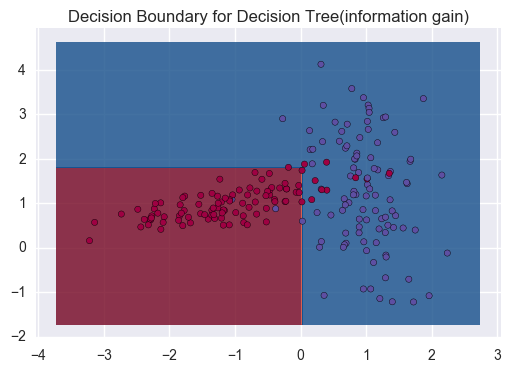

In [120]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, 30, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Decision Boundary for Decision Tree(information gain)")
plt.show()